The Kuramoto model is a model of coupled oscillators; it is often used to model the connectivity of the brain during epilepsy, or more generally, to model the brain in order to attempt to deduce connectivity from EEG experiments.

In the model there are a series of oscillators, each modelled as an angle $\theta_i$. A simple model of an oscillator, on its own, is to image that the angle gets bigger in time:
$$\theta_i=w_i t$$
where $w_i$ determines how quickly the oscillator oscillates. Of course when dealing with an angle we do so on the understanding that adding 360$^\circ$ to the angle is the same as not doing anything at all; or, using radians rather than degrees to measure angle, adding $2\pi$.

Ultimately we are going to joining oscillators together using differential equations, so it is useful to note that $\theta_i=w_i t$ is the same as saying
$$\frac{d\theta_i}{dt}=w_i$$
with $\theta_i(0)=0$; we will use this form, though we may change the initial value.

In the code that follows we represent the oscillator by a point in the $xy$-plane, specifically to a point on the unit circle around the origin with $\theta$ the angle the point makes with the $x$-axis. To do this we map the value $\theta_i$ to $(\cos{\theta},\sin{\theta})$.

In this code we solve $d\theta_i/dt=w_i$, make lists `x` and `y` to represent the position. There is then lots of plotting stuff which is a bit messing, you need not worry about this bit.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image  # To display the GIF

def update_theta(theta, w, delta):
    theta += delta * w
    if theta > 2 * np.pi:
        theta -= 2 * np.pi
    elif theta < 0:
        theta += 2 * np.pi
    return theta

w = 1.0  # Angular velocity

# Time parameters
t0 = 0.0
t1 = 10.0
n_points = 200

t = np.linspace(t0, t1, n_points)
delta = (t1 - t0) / n_points

theta = 0.0
x = np.zeros(n_points)
y = np.zeros(n_points)

for t_index in range(n_points):
    theta = update_theta(theta, w, delta)
    x[t_index] = np.cos(theta)
    y[t_index] = np.sin(theta)


# this is all plotting stuff
# don't worry about this!

class Update:
  def __init__(self,x,y,cursor):
    self.x=x
    self.y=y
    self.cursor=cursor

  def __call__(self,t):
    plt.clf()  # Clear the current figure
    plt.plot(self.x[t], self.y[t], self.cursor)
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    plt.gca().set_aspect('equal', adjustable='box')

update=Update(x,y,'ro')

# Create the animation
fig = plt.figure(figsize=(3, 3))
frames = range(n_points)
ani = FuncAnimation(fig, update, frames=frames)

# Save the animation as a GIF
gif_path = '/content/animation.gif'
ani.save(gif_path, writer='pillow', fps=20)
plt.close(fig)
Image(open(gif_path, 'rb').read())

In the Kuramoto model the oscillators satisfy
$$\frac{d\theta_i}{dt}=w_i+\frac{k}{n}\sum_{j\not= i}\sin{(\theta_j-\theta_i)}$$
This is for lots of oscillators, if you only had two the equations would be
$$\frac{d\theta_1}{dt}=w_1+\frac{k}{2}\sin{(\theta_2-\theta_1)}$$
$$\frac{d\theta_2}{dt}=w_2+\frac{k}{2}\sin{(\theta_1-\theta_2)}$$
where, an even broader model might have different $k$s for each pair of oscillators.

Anyway lets simulate this with $w_1=1.0$, $w_2=1.2$ and $k=0.2$. Experiment with different values, what happens if $k$ is negative for example? Can you make the oscillators rotate the other way?

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image  # To display the GIF



def update_theta(theta1,theta2, w1, k, delta):
    theta1 += delta * (w+k/2*np.sin(theta2-theta1))
    if theta1 > 2 * np.pi:
        theta1 -= 2 * np.pi
    elif theta1 < 0:
        theta1 += 2 * np.pi
    return theta1


w1 = 1.0
w2 = 1.2
k=0.2

# Time parameters
t0 = 0.0
t1 = 20.0
n_points = 500

t = np.linspace(t0, t1, n_points)
delta = (t1 - t0) / n_points

theta1 = 0.0
x1 = np.zeros(n_points)
y1 = np.zeros(n_points)


theta2 = random.uniform(0,2*np.pi)
x2 = np.zeros(n_points)
y2 = np.zeros(n_points)

for t_index in range(n_points):
  old_theta1=theta1
  theta1 = update_theta(theta1,theta2, w1, k, delta)
  theta2 = update_theta(theta2,old_theta1, w2, k, delta)
  x1[t_index] = np.cos(theta1)
  y1[t_index] = np.sin(theta1)
  x2[t_index] = np.cos(theta2)
  y2[t_index] = np.sin(theta2)


# this is all plotting stuff
# don't worry about this!

class Update:
  def __init__(self,x1,y1,x2,y2,cursor1,cursor2):
    self.x1=x1
    self.y1=y1
    self.cursor1=cursor1
    self.x2=x2
    self.y2=y2
    self.cursor2=cursor2

  def __call__(self,t):
    plt.clf()  # Clear the current figure
    plt.plot(self.x1[t], self.y1[t], self.cursor1)
    plt.plot(self.x2[t], self.y2[t], self.cursor2)
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    plt.gca().set_aspect('equal', adjustable='box')

update=Update(x1,y1,x2,y2,'bo','ro')


# Create the animation
fig = plt.figure(figsize=(3, 3))
frames = range(n_points)
ani = FuncAnimation(fig, update, frames=frames)

# Save the animation as a GIF
gif_path = '/content/animation.gif'
ani.save(gif_path, writer='pillow', fps=20)
plt.close(fig)
Image(open(gif_path, 'rb').read())

Here I have a six oscillators coupled together.

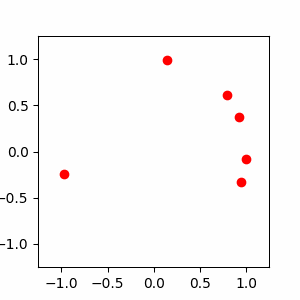

In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image  # To display the GIF



def update_theta(theta,i,old_theta, w, k, delta):
    current=0.0
    for j in range(len(old_theta)):
      if j!=i:
        current+=np.sin(old_theta[j]-theta)
    theta += delta * (w+k/2*current)
    if theta > 2 * np.pi:
        theta -= 2 * np.pi
    elif theta < 0:
        theta += 2 * np.pi
    return theta


k=-0.2

# Time parameters
t0 = 0.0
t1 = 20.0
n_points = 500

t = np.linspace(t0, t1, n_points)
delta = (t1 - t0) / n_points

n_oscillators=6

x = [np.zeros(n_points) for _ in range(n_oscillators)]
y = [np.zeros(n_points) for _ in range(n_oscillators)]

theta=[random.uniform(0,2*np.pi) for _ in range(n_oscillators)]

delta_w=0.1
w    =  [random.uniform(1-delta_w,1+delta_w) for _ in range(n_oscillators)]

for t_index in range(n_points):
  old_theta=theta.copy()
  for i in range(n_oscillators):
    theta[i] = update_theta(theta[i],i,old_theta, w[i], k, delta)
    x[i][t_index] = np.cos(theta[i])
    y[i][t_index] = np.sin(theta[i])


# this is all plotting stuff
# don't worry about this!

class Update:
  def __init__(self,x,y,cursor):
    self.x=x
    self.y=y
    self.cursor=cursor

  def __call__(self,t):
    plt.clf()  # Clear the current figure
    for k in range(len(self.x)):
      plt.plot(self.x[k][t], self.y[k][t], self.cursor)
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    plt.gca().set_aspect('equal', adjustable='box')

update=Update(x,y,'ro')


# Create the animation
fig = plt.figure(figsize=(3, 3))
frames = range(n_points)
ani = FuncAnimation(fig, update, frames=frames)

# Save the animation as a GIF
gif_path = '/content/animation.gif'
ani.save(gif_path, writer='pillow', fps=20)
plt.close(fig)
Image(open(gif_path, 'rb').read())